In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Реализация Matplotlib

Значения колонок: [2. 3. 0. 1. 1. 2. 0. 5. 1. 0. 3.]
Названия колонок: [ 0.          1.27272727  2.54545455  3.81818182  5.09090909  6.36363636
  7.63636364  8.90909091 10.18181818 11.45454545 12.72727273 14.        ]


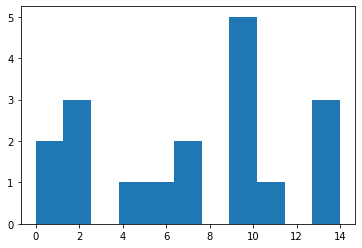

In [26]:
from numpy.random import Generator, MT19937

rnd = Generator(MT19937(3336))
array = rnd.integers(low=0, high=15, size=18)

value_counts, bins_names, _ = plt.hist(array, bins=len(set(array)))
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

### Авторская реализация

In [64]:
def fast_hist(data, bins=10):
    assert not (data is None or len(data) == 0), "invalid data"

    if bins is None:
        bins = int(np.log2(len(data))) + 1

    n = len(data)
    mn = min(data)
    mx = max(data)

    assert np.isfinite(mn) and np.isfinite(mx), "data contains non-finite values"

    h = (mx - mn) / bins
    bounds = [mn + i * h for i in range(bins + 1)]
    buckets = [0 for i in range(bins)]
    
    '''
    бинпоиск это конечно хорошо, но так как это питон, то сортировка будет быстрее
    for i in data:
        l, r = 0, bins
        while l + 1 < r:
            m = (l + r) // 2
            if bounds[m] <= i:
                l = m
            else:
                r = m
        buckets[l] += 1
    '''
    new_data = np.array(data.copy())
    new_data.sort()

    i = 0
    for j in new_data:
        while j >= bounds[i + 1] and i != bins - 1:
            i += 1
        buckets[i] += 1

    return buckets, bounds

value_counts2, bins_names2 = fast_hist(array, bins=len(set(array)))
print('Значения колонок:', value_counts2)
print('Названия колонок:', bins_names2)

Значения колонок: [2, 3, 0, 1, 1, 2, 0, 5, 1, 0, 3]
Названия колонок: [0.0, 1.2727272727272727, 2.5454545454545454, 3.8181818181818183, 5.090909090909091, 6.363636363636363, 7.636363636363637, 8.909090909090908, 10.181818181818182, 11.454545454545455, 12.727272727272727, 14.0]


### Сравнение скорости

In [45]:
data = rnd.uniform(low=0, high=100, size=100)

6.34 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


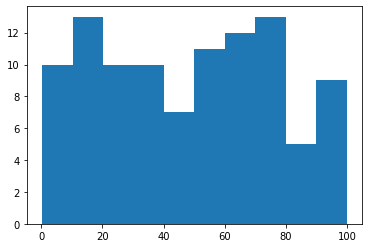

In [62]:
%timeit plt.hist(data)

In [65]:
%timeit fast_hist(data)

52 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Строим график

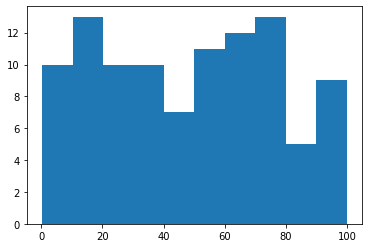

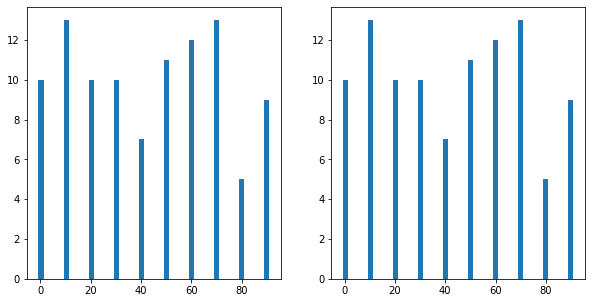

In [66]:
y1, x1, _ = plt.hist(data)
y2, x2 = fast_hist(data)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].bar(x1[:-1], y1, width=2)
axes[1].bar(x2[:-1], y2, width=2)
plt.show()